In [1]:
import torch
from  torch.autograd  import Variable
import matplotlib.pyplot as plt

N_SAMPLES =  20
N_HIDDEN = 300

In [2]:
#make training data
x = torch.unsqueeze(torch.linspace(-1,1,N_SAMPLES),1)
print('x:',x)
y = x + 0.3*torch.normal(torch.zeros(N_SAMPLES,1),torch.ones(N_SAMPLES,1))
print('y:',y)
x,y  = Variable(x),Variable(y)

#make test data
test_x = torch.unsqueeze(torch.linspace(-1,1,N_SAMPLES),1)
test_y = test_x + 0.3*torch.normal(torch.zeros(N_SAMPLES, 1), torch.ones(N_SAMPLES, 1))
test_x,test_y = Variable(test_x,volatile=True),Variable(test_y,volatile=True)

x: 
-1.0000
-0.8947
-0.7895
-0.6842
-0.5789
-0.4737
-0.3684
-0.2632
-0.1579
-0.0526
 0.0526
 0.1579
 0.2632
 0.3684
 0.4737
 0.5789
 0.6842
 0.7895
 0.8947
 1.0000
[torch.FloatTensor of size 20x1]

y: 
-0.8810
-1.2052
-1.2215
-0.9408
-0.5523
-0.5031
-0.7718
-0.3117
-0.3593
 0.1924
 0.5629
 0.6147
 0.5868
 0.5217
 0.5427
 0.6454
 1.0024
 0.6959
 0.8214
 1.5484
[torch.FloatTensor of size 20x1]



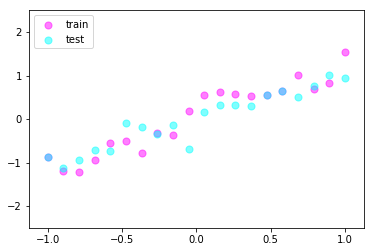

In [3]:
#show data 
plt.scatter(x.data.numpy(),y.data.numpy(),c='magenta',s=50,alpha=0.5,label='train')
plt.scatter(test_x.data.numpy(),test_y.data.numpy(),c='cyan',s=50,alpha=0.5,label='test')
plt.legend(loc='upper left')
plt.ylim((-2.5,2.5))
plt.show()




In [4]:
net_overfitting = torch.nn.Sequential(
        torch.nn.Linear(1,N_HIDDEN),
        torch.nn.ReLU(),
        torch.nn.Linear(N_HIDDEN,N_HIDDEN),
        torch.nn.ReLU(),
        torch.nn.Linear(N_HIDDEN,1)      
)

net_dropout = torch.nn.Sequential(
        torch.nn.Linear(1,N_HIDDEN),
        torch.nn.Dropout(0.3),
        torch.nn.ReLU(),
        torch.nn.Linear(N_HIDDEN,N_HIDDEN),
        torch.nn.Dropout(0.3),
        torch.nn.ReLU(),
        torch.nn.Linear(N_HIDDEN,1)   
)
print(net_overfitting)
print(net_dropout)

Sequential(
  (0): Linear(in_features=1, out_features=300)
  (1): ReLU()
  (2): Linear(in_features=300, out_features=300)
  (3): ReLU()
  (4): Linear(in_features=300, out_features=1)
)
Sequential(
  (0): Linear(in_features=1, out_features=300)
  (1): Dropout(p=0.3)
  (2): ReLU()
  (3): Linear(in_features=300, out_features=300)
  (4): Dropout(p=0.3)
  (5): ReLU()
  (6): Linear(in_features=300, out_features=1)
)


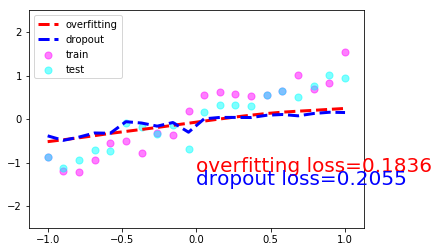

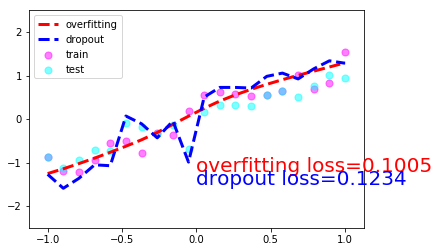

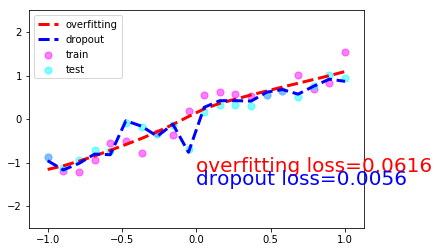

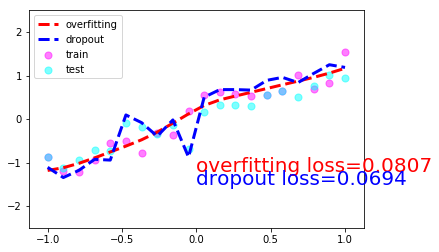

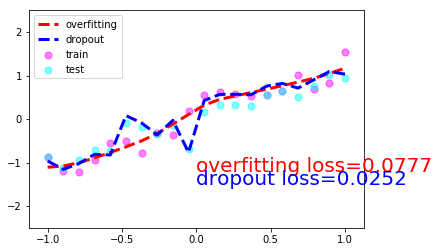

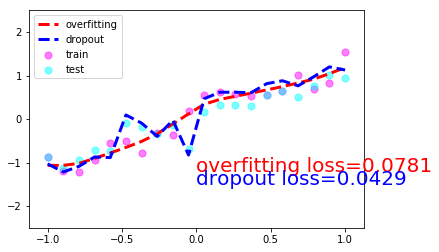

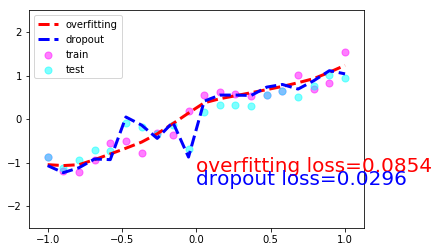

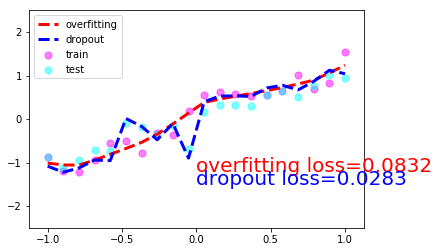

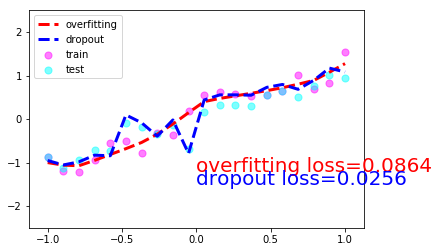

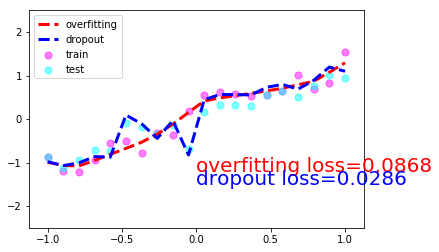

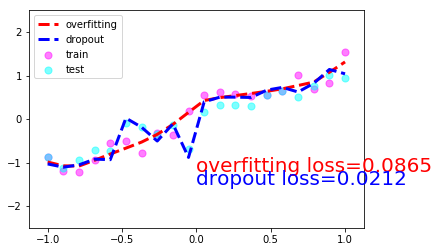

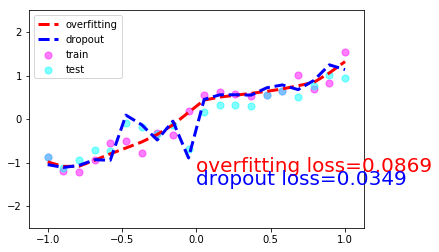

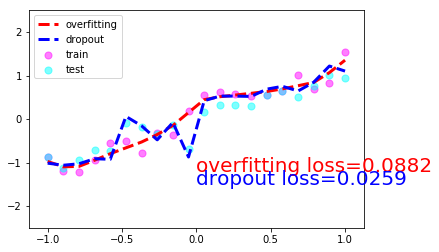

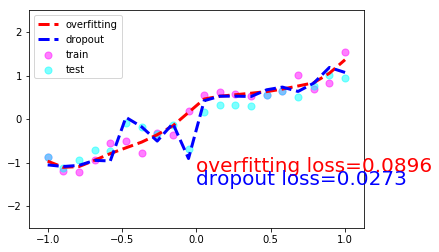

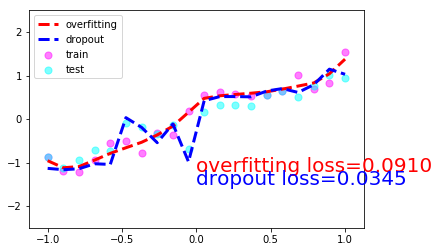

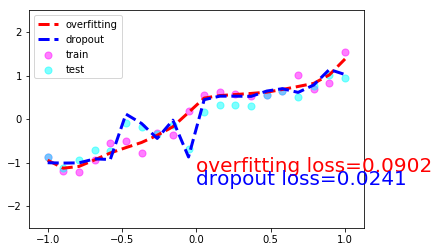

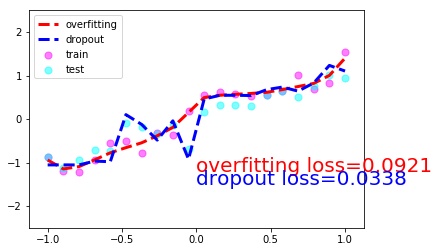

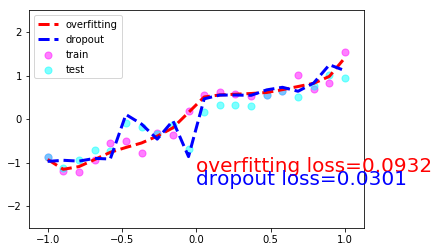

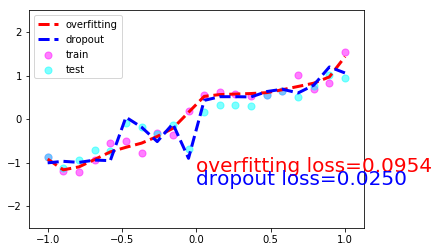

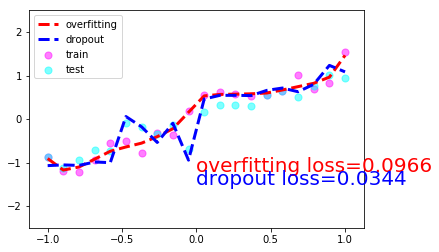

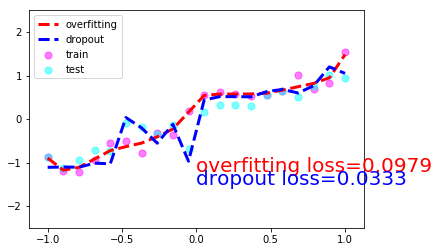

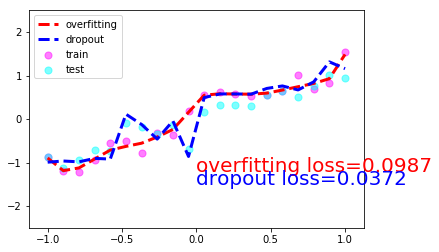

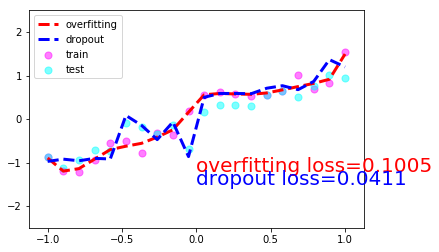

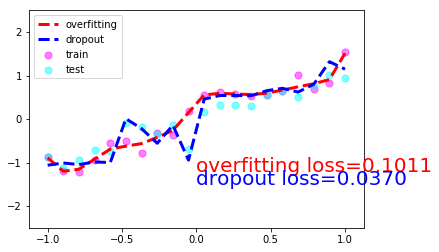

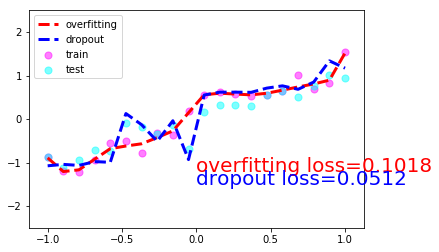

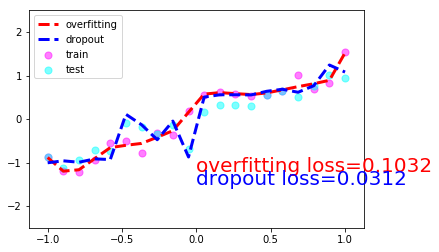

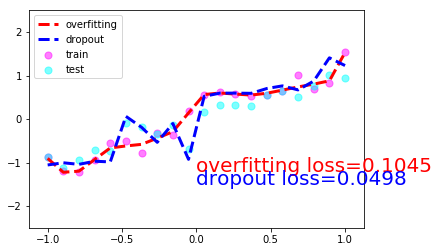

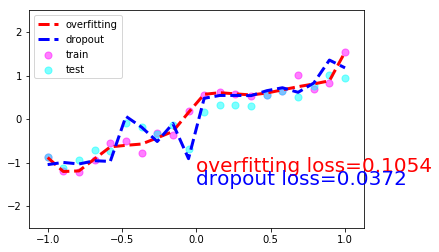

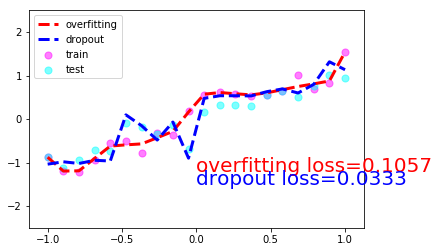

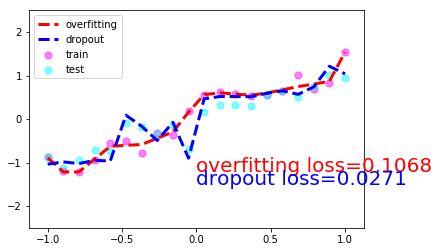

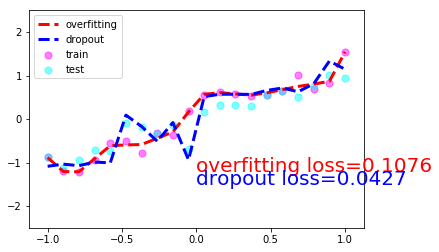

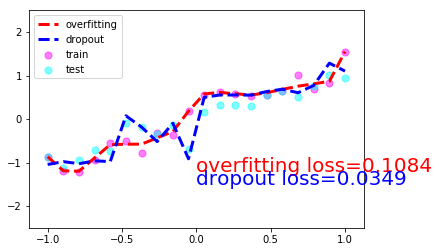

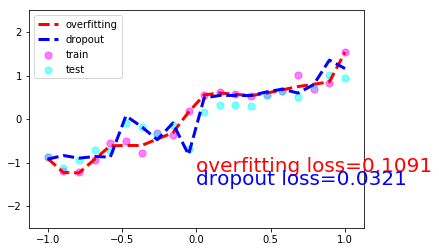

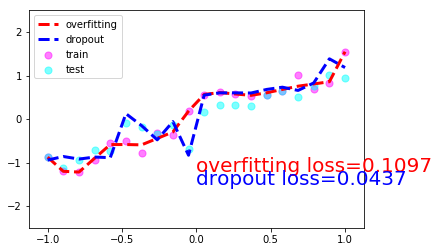

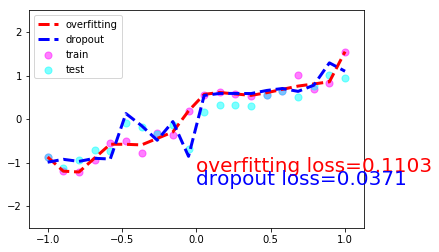

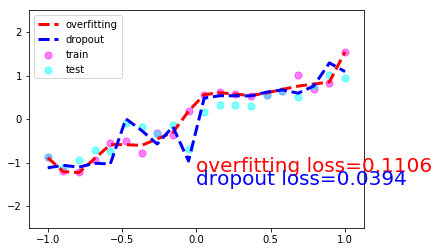

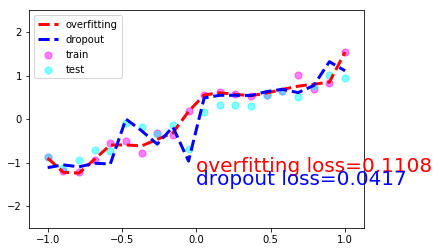

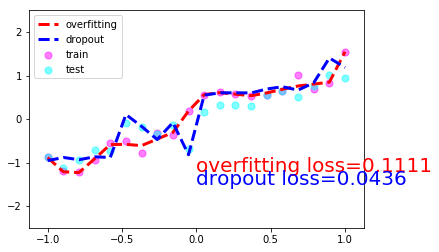

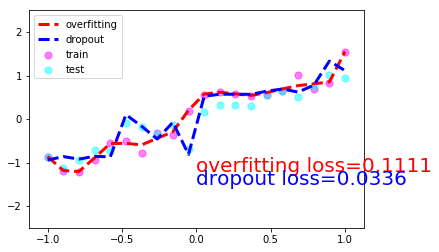

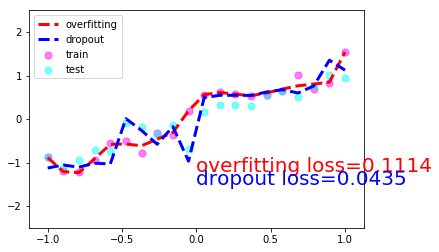

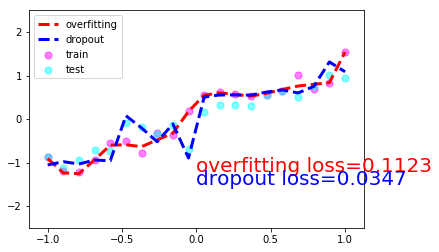

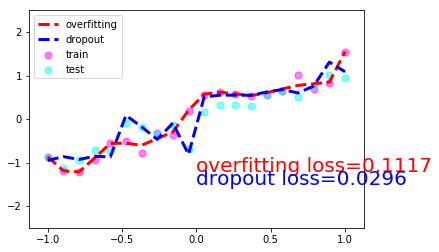

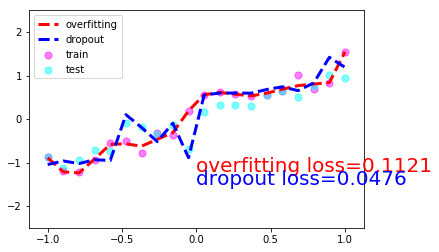

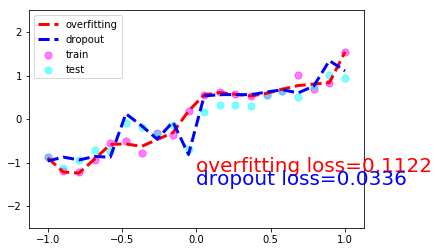

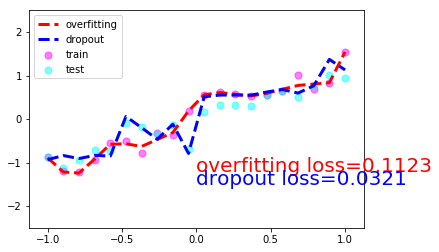

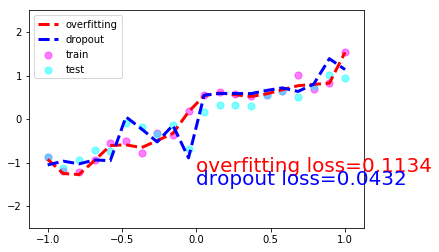

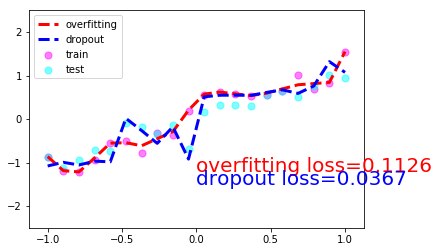

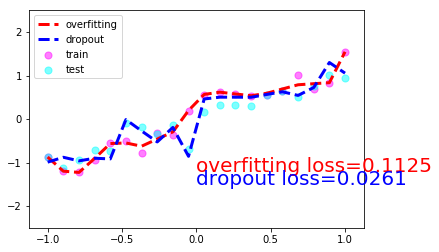

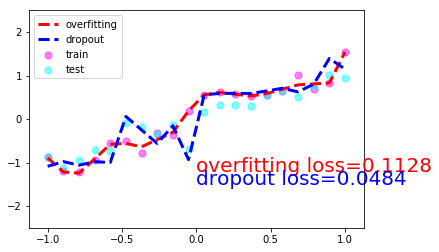

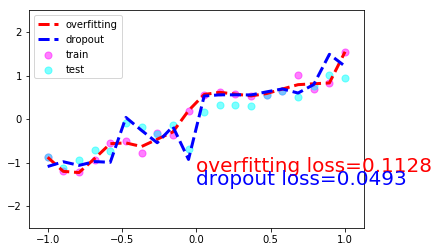

In [5]:
optimizer_ofit = torch.optim.Adam(net_overfitting.parameters(),lr = 0.001)
optimizer_drop = torch.optim.Adam(net_dropout.parameters(),lr = 0.001)
loss_func = torch.nn.MSELoss()
plt.ion()

loss_ofit_log=[]
loss_drop_log=[]
for t in range(500):
    prod_ofit = net_overfitting(x)
    prod_drop = net_dropout(x)
    loss_ofit = loss_func(prod_ofit,y)
    #print('loss_ofit:',loss_ofit)
    loss_ofit_log.append(float(loss_ofit.data[0]))
    
    loss_drop = loss_func(prod_drop,y)
    loss_drop_log.append(float(loss_drop.data[0]))
    
    optimizer_ofit.zero_grad()
    optimizer_drop.zero_grad()
    loss_ofit.backward()
    loss_drop.backward()
    optimizer_ofit.step()
    optimizer_drop.step()
    
    if t % 10 == 0:
        net_overfitting.eval()
        net_dropout.eval()
        
        
        plt.cla()
        test_pred_ofit = net_overfitting(test_x)
        test_pred_drop = net_dropout(test_y)
        plt.scatter(x.data.numpy(),y.data.numpy(),c='magenta',s=50,alpha=0.5,label='train')
        plt.scatter(test_x.data.numpy(),test_y.data.numpy(),c='cyan',s=50,alpha=0.5,label='test')
        plt.plot(test_x.data.numpy(),test_pred_ofit.data.numpy(),'r--',lw=3,label='overfitting')
        plt.plot(test_x.data.numpy(),test_pred_drop.data.numpy(),'b--',lw=3,label='dropout')
        plt.text(0,-1.2,'overfitting loss=%.4f'%loss_func(test_pred_ofit,test_y).data[0],fontdict={'size':20,'color':'red'})
        plt.text(0,-1.5,'dropout loss=%.4f'%loss_func(test_pred_drop,test_y).data[0],fontdict={'size':20,'color':'blue'})
        plt.legend(loc='upper left');plt.ylim((-2.5,2.5));plt.pause(0.1)
     
        #change back to train mode
        net_overfitting.train()
        net_dropout.train()

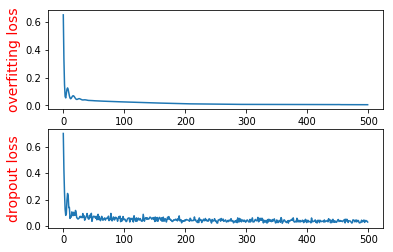

In [6]:
plt.ioff()
x = torch.linspace(0,499,500).numpy()
plt.subplot(211)
plt.plot(x,loss_ofit_log)
plt.ylabel('overfitting loss',fontsize=14,color='red')
plt.subplot(212)
plt.plot(x,loss_drop_log)
plt.ylabel('dropout loss',fontsize=14,color='red')
plt.show()